# Timing statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [2]:
table = pd.read_json("recontiming128-1024_20210208.json", orient="index")
table.head()

,data,timing
2021-02-08 13:50:06,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.5266, 'MorphSpotClean': 85.6..."
2021-02-08 13:50:12,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7878, 'MorphSpotClean': 103...."
2021-02-08 13:50:18,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 3.0385, 'MorphSpotClean': 107...."
2021-02-08 13:50:23,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.8213, 'MorphSpotClean': 99.7..."
2021-02-08 13:50:29,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7232000000000003, 'MorphSpot..."


In [8]:
table['timing']['2021-02-08 13:50:06']

{'FullLogNorm': 2.5266,
 'MorphSpotClean': 85.68,
 'Multi projection BP parallel': 70.7251,
 'WaveletRingClean': 337.965,
 'total': 6089.34}

In [13]:
table['total']=np.nan
table['Time/slice']=np.nan
table['size']=np.nan
table['Total GUPS']=np.nan
table['GUPS/slice']=np.nan
table['FullLogNorm']=np.nan
table['MorphSpotClean']=np.nan
table['WaveletRingClean']=np.nan
table['Multi projection BP parallel']=np.nan


for ind in table.index: 
    table['total'][ind] = table['timing'][ind]['total'] 
    datadict = table['data'][ind] 
    sum=1
    for key in datadict :
        sum = sum * datadict[key]
        
    timingdict = table['timing'][ind]
    for key in timingdict :
        table[key][ind]=timingdict[key]

        

    table['size'][ind]       = datadict['sizeu']  
    table['Time/slice'][ind] = table['total'][ind]/datadict['sizeu'] 
    table['Total GUPS'][ind] = sum/table['total'][ind]/1e9
    table['GUPS/slice'][ind] = table['Total GUPS'][ind]/datadict['sizez']**2
        

C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCo

In [14]:
table.head()

,data,timing,total,Time/slice,size,Total GUPS,GUPS/slice,FullLogNorm,MorphSpotClean,WaveletRingClean,Multi projection BP parallel
2021-02-08 13:50:06,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.5266, 'MorphSpotClean': 85.6...",6089.34,47.572969,128.0,0.722253,0.000044,2.5266,85.6800,337.965,70.7251
2021-02-08 13:50:12,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7878, 'MorphSpotClean': 103....",5539.84,43.280000,128.0,0.793894,0.000048,2.7878,103.4780,341.520,63.3618
2021-02-08 13:50:18,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 3.0385, 'MorphSpotClean': 107....",5608.43,43.815859,128.0,0.784185,0.000048,3.0385,107.3620,360.565,86.1035
2021-02-08 13:50:23,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.8213, 'MorphSpotClean': 99.7...",5601.16,43.759062,128.0,0.785203,0.000048,2.8213,99.7965,352.548,75.8301
2021-02-08 13:50:29,"{'projections': 128, 'sizeu': 128, 'sizev': 12...","{'FullLogNorm': 2.7232000000000003, 'MorphSpot...",5547.49,43.339766,128.0,0.792799,0.000048,2.7232,120.2940,330.727,61.4426


In [15]:
sizes = []
avgTotalTime = []
stdTotalTime = []
avgSliceTime = []
stdSliceTime = []
avgGUPS = []
avgNorm = []
avgSpot = []
avgRing = []
avgBP   = []
avgOther = []

scale = 1000
for s in table['size'].unique() :
    sizes.append(int(s))
    avgTotalTime.append(table[table['size']==s]['total'].mean()/scale)
    stdTotalTime.append(table[table['size']==s]['total'].std()/scale)
    avgSliceTime.append(table[table['size']==s]['Time/slice'].mean()/scale)
    stdSliceTime.append(table[table['size']==s]['Time/slice'].std()/scale)
    avgGUPS.append(table[table['size']==s]['Total GUPS'].mean())
    avgNorm.append(table[table['size']==s]['FullLogNorm'].mean()/scale)
    avgSpot.append(table[table['size']==s]['MorphSpotClean'].mean()/scale)
    avgRing.append(table[table['size']==s]['WaveletRingClean'].mean()/scale)
    avgBP.append(table[table['size']==s]['Multi projection BP parallel'].mean()/scale)
    avgOther.append(avgTotalTime[-1]
                    -avgNorm[-1]
                    -avgSpot[-1]
                    -avgRing[-1]
                    -avgBP[-1])

data = {'size': sizes, 
        'Total time': avgTotalTime, 
        'std Total time': stdTotalTime, 
        'Time/slice': avgSliceTime, 
        'std Time/slice': stdSliceTime,
        'GUPS': avgGUPS,
        'Normalization': avgNorm,
        'Spot cleaning': avgSpot,
        'Ring cleaning': avgRing,
        'Back projection': avgBP,
        'Others': avgOther}

timings = pd.DataFrame.from_dict(data).sort_values('size')

In [16]:
timings

,size,Total time,std Total time,Time/slice,std Time/slice,GUPS,Normalization,Spot cleaning,Ring cleaning,Back projection,Others
0,128,5.617045,0.167905,0.043883,0.001312,0.783570,0.002487,0.105188,0.339511,0.071805,5.098054
1,256,13.886830,0.142442,0.054245,0.000556,20.271085,0.014636,0.749821,1.604514,0.598674,10.919185
2,384,27.250870,0.839216,0.070966,0.002185,117.747435,0.044769,2.307246,4.423734,2.509147,17.965974
3,512,47.194460,1.073440,0.092177,0.002097,381.874123,0.101131,5.217150,9.582777,6.243584,26.049817
4,768,123.481600,2.728090,0.160783,0.003552,1662.440668,0.324856,16.856720,29.354990,29.952610,46.992424
5,1024,263.010000,2.098288,0.256846,0.002049,4383.812743,0.786089,39.306190,67.445410,81.563720,73.908591


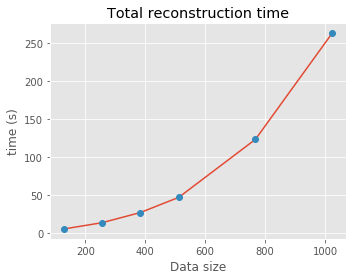

In [17]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Total time'])
plt.plot(timings['size'],timings['Total time'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Total reconstruction time');
plt.tight_layout()
plt.savefig('totaltime.svg')
plt.savefig('totaltime.png',dpi=300)

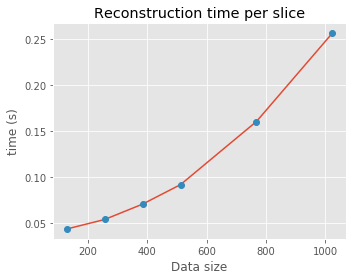

In [18]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

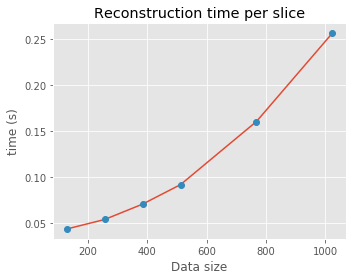

In [19]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

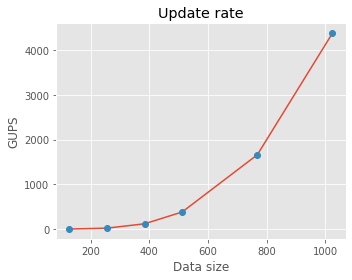

In [20]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['GUPS'])
plt.plot(timings['size'],timings['GUPS'],'o')
plt.xlabel('Data size')
plt.ylabel('GUPS')
plt.title('Update rate');
plt.tight_layout()
plt.savefig('GUPS.svg')
plt.savefig('GUPS.png',dpi=300)

<Figure size 360x360 with 0 Axes>

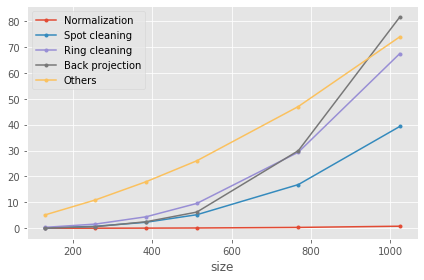

In [21]:
plt.figure(figsize=(5,5))
timings.plot('size',['Normalization','Spot cleaning','Ring cleaning','Back projection','Others'],style='.-')
plt.tight_layout()

<Figure size 360x360 with 0 Axes>

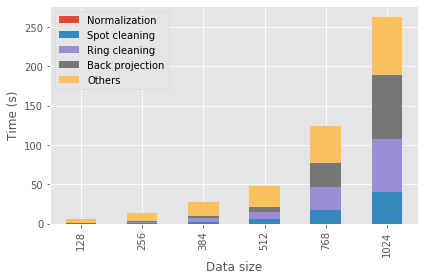

In [22]:
plt.figure(figsize=(5,5))
timings.plot.bar('size',['Normalization','Spot cleaning','Ring cleaning','Back projection','Others'],stacked=True)
plt.xlabel('Data size')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('timepertask.svg')
plt.savefig('timepertask.png',dpi=300)